# Brazilian Derivatives and Securities

## Update 1 - 28-May-2016

## Fixings: IR: CDI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In chapter 17 of our book we warn that things change (and fast).
This is the first online update of our book, and it deals with the CDI.

In fact, it deals with the fall(back) of the CDI.

Bach in 2014, as we wrote the first two chapters of the book, we had seen the spread CDI-Selic go (and stay) up, and therefore we were worried about this spread being another risk factor, as new contracts started trading at BVMF referring to the Selic instead of the CDI. The chart below shows the spread up to 2014.

In [2]:
path=''
filename='CDI.xlsx'

In [3]:
CDIfile=pd.ExcelFile(''.join((path,filename)))
CDIdata=CDIfile.parse('Sheet1')
CDIData=CDIdata.set_index('Date')

In [4]:
CDIData['Spread']=CDIData['CDI']-CDIData['SELIC']
CDIData['Fallback']=pd.isnull(CDIData['StdDev'])

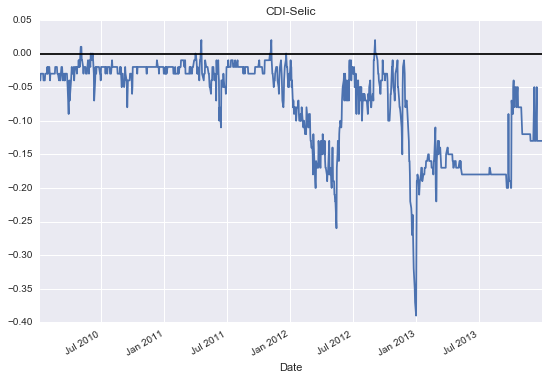

In [7]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData['Spread']['2010-1-1':'2014-1-1'].plot(title="CDI-Selic")
plt.axhline(0, color='k')

But the number of trades in the daily sample continued to decrease:

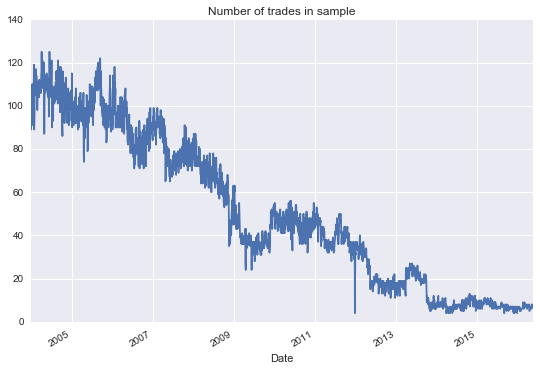

In [9]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData['#Op'].plot(title="Number of trades in sample")

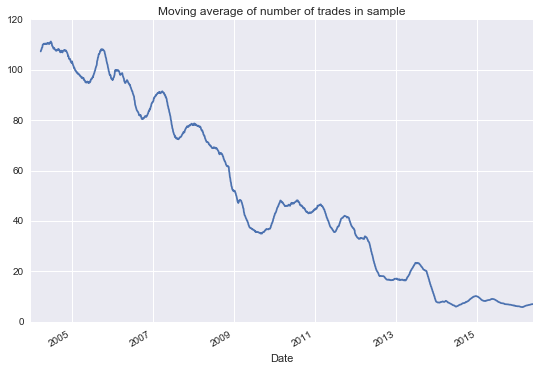

In [10]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData['#Op'].rolling(window=60).mean()\
    .plot(title="Moving average of number of trades in sample")

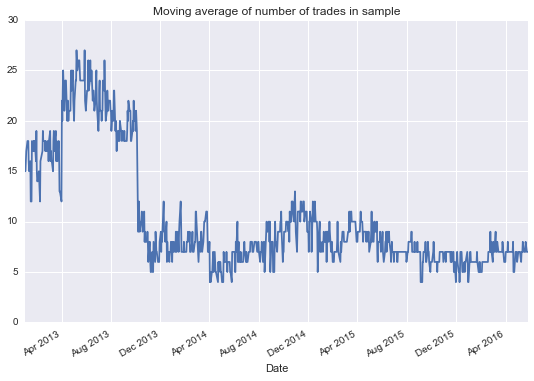

In [12]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData['#Op']['2013-1-1':].plot(title="Number of trades in sample")

And in 2014 we reached a point where having less than 10 trades was the rule rather than the exception, as seen above.

The fallback methodology implemented by CETIP for these occasions is available here:

http://estatisticas.cetip.com.br/astec/di_documentos/metodologia1_i1.htm

Which is basically a linear regression with the CDI as a function of the Selic. We would have modelled the spread as a function of time and the Selic, but …

Anyway, with this methodology the spread became closer to zero:

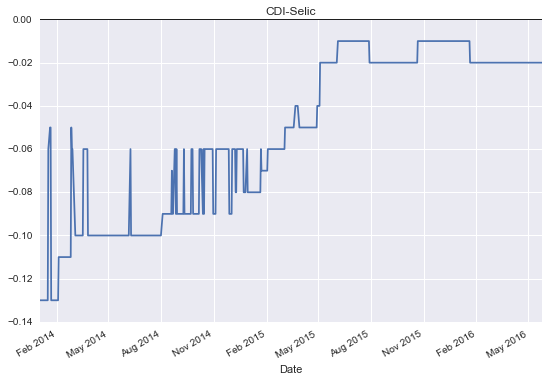

In [13]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData['Spread']['2014-1-1':].plot(title="CDI-Selic")
plt.axhline(0, color='k')

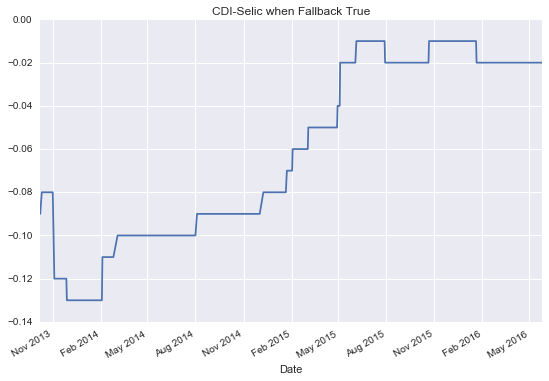

In [14]:
plt.figure(figsize=(9, 6), dpi=1200)
CDIData[CDIData['Fallback']]['Spread']\
    .plot(title="CDI-Selic when Fallback True")

So, for the last year the fallback has been used every day, and the spread has been negative by 1 or 2 bp for this whole period.

Chances now are rather in favour of a scenario where the CDI becomes equal to the Selic. Until there, watch out.